In [2]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

2023-07-18 09:39:48.084581: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-18 09:39:48.125484: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-18 09:39:48.311225: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-18 09:39:48.315046: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 09:39:49.737128: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [10]:
def build_model(my_learning_rate):
    # Most simple tf.keras models are sequential. 
    # A sequential model contains one or more layers.
    model=tf.keras.models.Sequential()
    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer.
    model.add(tf.keras.layers.Dense(units=1,input_shape=(1,)))
    # Compile the model topography into code that 
    # TensorFlow can efficiently execute. Configure 
    # training to minimize the model's mean squared error. 
    model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),loss="mean_squared_error",metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model
def train_model(model,feature,label,epochs,batch_size):
    # Feed the feature values and the label values to the 
    # model. The model will train for the specified number 
    # of epochs, gradually learning how the feature values
    # relate to the label values.
    history=model.fit(x=feature,y=label,batch_size=batch_size,epochs=epochs) 
    # Gather the trained model's weight and bias.
    trained_weight=model.get_weights()[0]
    trained_bias=model.get_weights()[1]

    # The list of epochs is stored separately from the 
    # rest of history.
    epochs=history.epoch

    # Gather the history (a snapshot) of each epoch.
    hist=pd.DataFrame(history.history)

    # Specifically gather the model's root mean 
    # squared error at each epoch.

    rmse=hist["root_mean_squared_error"]

    return trained_weight,trained_bias,epochs,rmse

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


In [11]:
def plot_the_model(trained_weight,trained_bias,feature,label):

    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")

    # Plot the feature values vs. label values.
    plt.scatter(feature,label)

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0=0
    y0=trained_bias
    x1=feature[-1]
    y1=trained_bias+(trained_weight*x1)
    plt.plot([x0,x1],[y0,y1],c='r')

    # Render the scatter plot and the red line.
    plt.show()

def plot_the_loss_curve(epochs,rmse):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs,rmse,label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97,rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [12]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 0s 122ms/step - loss: 565.5480 - root_mean_squared_error: 23.7813
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 553.2090 - root_mean_squared_error: 23.5204
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 544.3890 - root_mean_squared_error: 23.3321
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 537.0816 - root_mean_squared_error: 23.1750
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 530.6517 - root_mean_squared_error: 23.0359
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 524.8049 - root_mean_squared_error: 22.9086
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 519.3773 - root_mean_squared_error: 22.7899
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 514.2673 - root_mean_squared_error: 22.6775
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 509.4068 - root_

/home/franksitawa/anaconda3/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


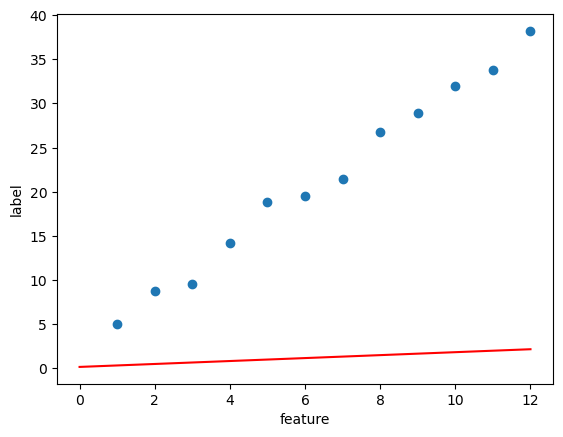

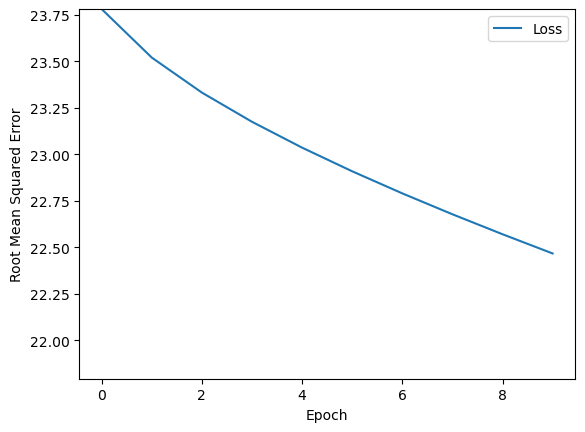

In [18]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight,trained_bias,epochs,rmse=train_model(my_model,my_feature,my_label,epochs,my_batch_size)

plot_the_model(trained_weight,trained_bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

Epoch 1/450
1/1 [==============================] - 0s 161ms/step - loss: 727.9826 - root_mean_squared_error: 26.9812
Epoch 2/450
1/1 [==============================] - 0s 3ms/step - loss: 713.9728 - root_mean_squared_error: 26.7203
Epoch 3/450
1/1 [==============================] - 0s 3ms/step - loss: 703.9409 - root_mean_squared_error: 26.5319
Epoch 4/450
1/1 [==============================] - 0s 3ms/step - loss: 695.6188 - root_mean_squared_error: 26.3746
Epoch 5/450
1/1 [==============================] - 0s 4ms/step - loss: 688.2883 - root_mean_squared_error: 26.2352
Epoch 6/450
1/1 [==============================] - 0s 4ms/step - loss: 681.6160 - root_mean_squared_error: 26.1078
Epoch 7/450
1/1 [==============================] - 0s 4ms/step - loss: 675.4170 - root_mean_squared_error: 25.9888
Epoch 8/450
1/1 [==============================] - 0s 5ms/step - loss: 669.5760 - root_mean_squared_error: 25.8762
Epoch 9/450
1/1 [==============================] - 0s 3ms/step - loss: 664.016

/home/franksitawa/anaconda3/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


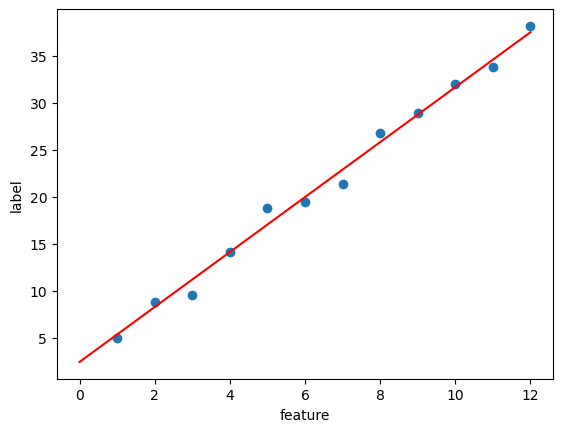

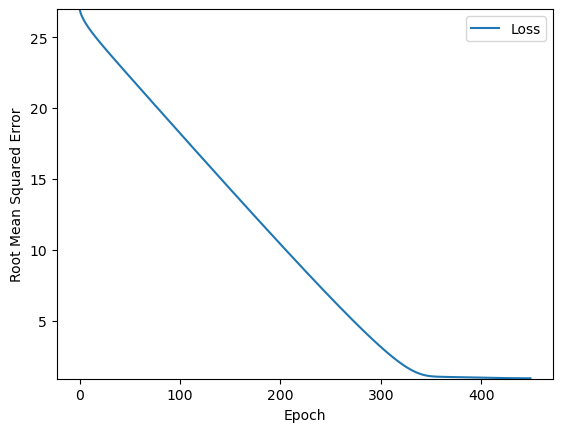

In [19]:
learning_rate=0.01
epochs= 450  
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/450
1/1 [==============================] - 0s 134ms/step - loss: 1180.5161 - root_mean_squared_error: 34.3586
Epoch 2/450
1/1 [==============================] - 0s 4ms/step - loss: 6638568.0000 - root_mean_squared_error: 2576.5417
Epoch 3/450
1/1 [==============================] - 0s 4ms/step - loss: 1166.2289 - root_mean_squared_error: 34.1501
Epoch 4/450
1/1 [==============================] - 0s 4ms/step - loss: 7.0666 - root_mean_squared_error: 2.6583
Epoch 5/450
1/1 [==============================] - 0s 4ms/step - loss: 1.7276 - root_mean_squared_error: 1.3144
Epoch 6/450
1/1 [==============================] - 0s 8ms/step - loss: 1.5987 - root_mean_squared_error: 1.2644
Epoch 7/450
1/1 [==============================] - 0s 15ms/step - loss: 1.5495 - root_mean_squared_error: 1.2448
Epoch 8/450
1/1 [==============================] - 0s 3ms/step - loss: 1.5036 - root_mean_squared_error: 1.2262
Epoch 9/450
1/1 [==============================] - 0s 3ms/step - loss: 1.4586 - root

/home/franksitawa/anaconda3/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


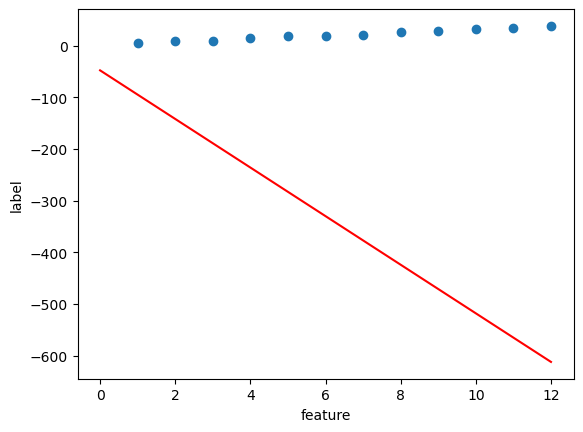

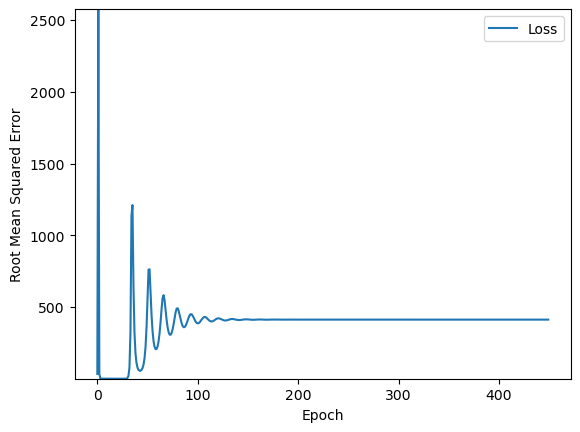

In [20]:
learning_rate=100
epochs= 450
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/70
1/1 [==============================] - 0s 124ms/step - loss: 748.5759 - root_mean_squared_error: 27.3601
Epoch 2/70
1/1 [==============================] - 0s 4ms/step - loss: 562.0766 - root_mean_squared_error: 23.7082
Epoch 3/70
1/1 [==============================] - 0s 3ms/step - loss: 451.4014 - root_mean_squared_error: 21.2462
Epoch 4/70
1/1 [==============================] - 0s 3ms/step - loss: 371.9337 - root_mean_squared_error: 19.2856
Epoch 5/70
1/1 [==============================] - 0s 3ms/step - loss: 310.3915 - root_mean_squared_error: 17.6179
Epoch 6/70
1/1 [==============================] - 0s 3ms/step - loss: 260.7896 - root_mean_squared_error: 16.1490
Epoch 7/70
1/1 [==============================] - 0s 3ms/step - loss: 219.8454 - root_mean_squared_error: 14.8272
Epoch 8/70
1/1 [==============================] - 0s 3ms/step - loss: 185.5330 - root_mean_squared_error: 13.6210
Epoch 9/70
1/1 [==============================] - 0s 3ms/step - loss: 156.4972 - root_

/home/franksitawa/anaconda3/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


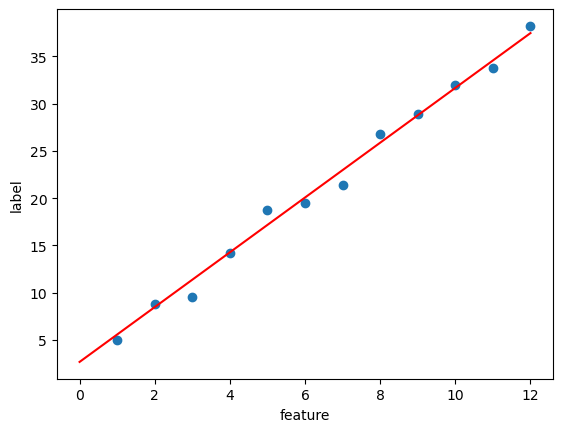

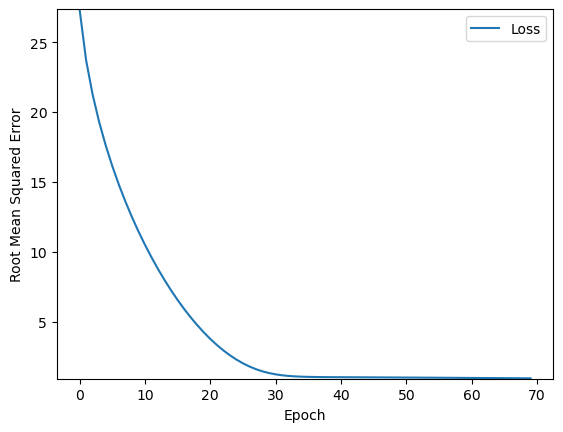

In [21]:
learning_rate=0.14
epochs=70

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/125
12/12 [==============================] - 0s 757us/step - loss: 181.4391 - root_mean_squared_error: 13.4699
Epoch 2/125
12/12 [==============================] - 0s 636us/step - loss: 84.0294 - root_mean_squared_error: 9.1668
Epoch 3/125
12/12 [==============================] - 0s 714us/step - loss: 36.2763 - root_mean_squared_error: 6.0230
Epoch 4/125
12/12 [==============================] - 0s 716us/step - loss: 11.9449 - root_mean_squared_error: 3.4561
Epoch 5/125
12/12 [==============================] - 0s 668us/step - loss: 2.7935 - root_mean_squared_error: 1.6714
Epoch 6/125
12/12 [==============================] - 0s 705us/step - loss: 1.0813 - root_mean_squared_error: 1.0398
Epoch 7/125
12/12 [==============================] - 0s 741us/step - loss: 1.0604 - root_mean_squared_error: 1.0297
Epoch 8/125
12/12 [==============================] - 0s 644us/step - loss: 1.0856 - root_mean_squared_error: 1.0419
Epoch 9/125
12/12 [==============================] - 0s 700us/step

/home/franksitawa/anaconda3/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


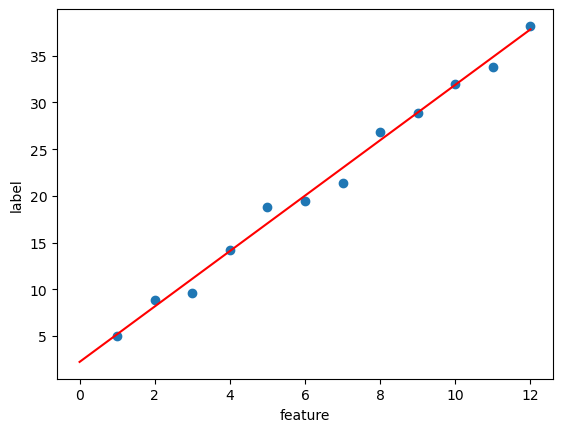

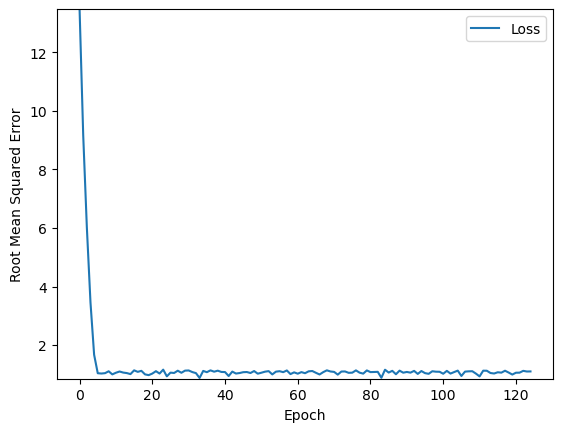

In [22]:
learning_rate=0.05
epochs=125
my_batch_size=1

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)